In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("database_votes.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'idScrutin', 'idVotant', 'vote', 'organeRefGroupe',
       'date_scrutin', 'code_type_vote', 'titre', 'demandeur', 'organe_ref',
       'votants', 'pour', 'contre', 'non_votants', 'non_votants_volontaires',
       'abstention', 'resultat'],
      dtype='object')

In [5]:
df.head(400)

,Unnamed: 0,idScrutin,idVotant,vote,organeRefGroupe,date_scrutin,code_type_vote,titre,demandeur,organe_ref,votants,pour,contre,non_votants,non_votants_volontaires,abstention,resultat
0,0,0,PA606171,Non-votant,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,56,0,2,0,1,adopté
1,1,0,PA721824,Non-votant,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,56,0,2,0,1,adopté
2,2,0,PA719952,Pour,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,56,0,2,0,1,adopté
3,3,0,PA607395,Pour,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,56,0,2,0,1,adopté
4,4,0,PA718710,Pour,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",PO717460,57,56,0,2,0,1,adopté
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,6,PA719230,Contre,PO730964,2020-07-30,SPO,l'amendement n° 930 de Mme Obono à l'article 4...,"Président du groupe ""La France insoumise""",PO717460,85,8,75,2,0,2,rejeté
396,396,6,PA719338,Contre,PO730964,2020-07-30,SPO,l'amendement n° 930 de Mme Obono à l'article 4...,"Président du groupe ""La France insoumise""",PO717460,85,8,75,2,0,2,rejeté
397,397,6,PA719350,Contre,PO730964,2020-07-30,SPO,l'amendement n° 930 de Mme Obono à l'article 4...,"Président du groupe ""La France insoumise""",PO717460,85,8,75,2,0,2,rejeté
398,398,6,PA719364,Contre,PO730964,2020-07-30,SPO,l'amendement n° 930 de Mme Obono à l'article 4...,"Président du groupe ""La France insoumise""",PO717460,85,8,75,2,0,2,rejeté


In [6]:
#30% scrutin soumis au vote ont été adoptés 
df[df['resultat'].isin(['adopté'])].count()*100/df.count()

Unnamed: 0                 30.022562
idScrutin                  30.022562
idVotant                   30.022756
vote                       30.022756
organeRefGroupe            30.022756
date_scrutin               30.022562
code_type_vote             30.022562
titre                      30.022562
demandeur                  30.079033
organe_ref                 30.022562
votants                    30.022562
pour                       30.022562
contre                     30.022562
non_votants                30.022562
non_votants_volontaires    30.022562
abstention                 30.022562
resultat                   30.022562
dtype: float64

In [7]:
#on regarde les stats pour chaque scrutin
df.groupby('idScrutin').sum()

,Unnamed: 0,votants,pour,contre,non_votants,non_votants_volontaires,abstention
idScrutin,,,,,,,
0,1653,3306,3248,0,116,0,58
1,2812,1295,333,962,74,0,0
2,13301,8742,3102,5546,188,0,94
3,26190,11556,2052,9396,216,0,108
4,13674,1763,215,1548,86,0,0
...,...,...,...,...,...,...,...
3114,21297609,8901,1173,7590,138,0,138
3115,22846205,2738,2368,296,148,0,74
3116,49106991,11607,4134,6519,318,0,954


In [8]:
df.groupby('idScrutin').count()

,Unnamed: 0,idVotant,vote,organeRefGroupe,date_scrutin,code_type_vote,titre,demandeur,organe_ref,votants,pour,contre,non_votants,non_votants_volontaires,abstention,resultat
idScrutin,,,,,,,,,,,,,,,,
0,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58
1,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
2,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94
3,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108
4,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3114,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
3115,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74
3116,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159


In [9]:
#on regarde l'abstention par scrutin
df.groupby('idScrutin')['abstention']
#on regarde l'abstention moyenne : 
#chaque scrutin apparaît plusieurs fois donc on doit diviser par le nombre d'occurence de chaque scrutin
(df.groupby('idScrutin').sum()/df.groupby('idScrutin').count())['abstention'].mean()
#il y a en moyenne 5 abstention par scrutin

5.015389547932029

Il y a en moyenne 5 abstentions par scrutin

In [10]:
#on calcule le ratio absention/vote 
df['ratioabstention'] = df['abstention']/df['votants']

In [11]:
df['ratioabstention'].describe()

count    308931.000000
mean          0.046250
std           0.050127
min           0.000000
25%           0.009217
50%           0.030488
75%           0.066667
max           0.445783
Name: ratioabstention, dtype: float64

moyenne à 4,6% et 3ème quartile à 6,7% => le max est vraiment très max donc apparemment certains scrutins ont eu une très forte absention par rapport aux autres -> on va essayer de regarder ces valeurs extrêmes

In [12]:
df.sort_values(by='ratioabstention', ascending = False).head(20)
df[df['ratioabstention']>0.20].count()
df2 = df[~df['ratioabstention'].isin(['0'])]
df2 = df2[df2['ratioabstention']<0.20]

In [13]:
df2['ratioabstention'].describe()

count    246885.000000
mean          0.053187
std           0.042531
min           0.001742
25%           0.020619
50%           0.040000
75%           0.073684
max           0.195652
Name: ratioabstention, dtype: float64

ça lisse la fin de la distribution -> il faudrait voir en quoi les scrutins qu'on a enlevés, cad ceux avec des valeurs très hautes diffèrent, des autres 

In [14]:
df3 = df[df['ratioabstention']>=0.20]
df3.count()
df3['titre']
#c'est pas lisible : il faudrait modifier le nom des lois

340       l'ensemble de la proposition de loi relative à...
341       l'ensemble de la proposition de loi relative à...
342       l'ensemble de la proposition de loi relative à...
343       l'ensemble de la proposition de loi relative à...
344       l'ensemble de la proposition de loi relative à...
                                ...                        
304630    l'amendement n° 423 du Gouvernement et les ame...
304631    l'amendement n° 423 du Gouvernement et les ame...
304632    l'amendement n° 423 du Gouvernement et les ame...
304633    l'amendement n° 423 du Gouvernement et les ame...
304634    l'amendement n° 423 du Gouvernement et les ame...
Name: titre, Length: 4725, dtype: object

on pourrait regarder aussi les scrutins où il n'y a pas du tout d'abstention -> est-ce que ça polarise plus les votes ou non ? 

In [15]:
df4 = df[df['ratioabstention'].isin(['0'])]
df4.groupby('idScrutin').count() #on a 635 scrutins où le ratio abstention/votants est nul
#on vérifie si on a bien le même nombre de scrutins où l'abstention est nulle dans le df original
ab = df[df['abstention'].isin(['0'])].groupby('idScrutin')
ab.count() #on a bien 635 lignes cad 635 scrutins où l'abstention est nulle
df4.head(20)

,Unnamed: 0,idScrutin,idVotant,vote,organeRefGroupe,date_scrutin,code_type_vote,titre,demandeur,organe_ref,votants,pour,contre,non_votants,non_votants_volontaires,abstention,resultat,ratioabstention
58,58,1,PA606171,Pour,PO730964,2019-03-15,SPO,l'amendement n°23 de M. Potier à l'article 62 ...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,35,9,26,2,0,0,rejeté,0.0
59,59,1,PA721852,Contre,PO730964,2019-03-15,SPO,l'amendement n°23 de M. Potier à l'article 62 ...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,35,9,26,2,0,0,rejeté,0.0
60,60,1,PA718710,Contre,PO730964,2019-03-15,SPO,l'amendement n°23 de M. Potier à l'article 62 ...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,35,9,26,2,0,0,rejeté,0.0
61,61,1,PA719024,Contre,PO730964,2019-03-15,SPO,l'amendement n°23 de M. Potier à l'article 62 ...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,35,9,26,2,0,0,rejeté,0.0
62,62,1,PA719080,Contre,PO730964,2019-03-15,SPO,l'amendement n°23 de M. Potier à l'article 62 ...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,35,9,26,2,0,0,rejeté,0.0
63,63,1,PA719170,Contre,PO730964,2019-03-15,SPO,l'amendement n°23 de M. Potier à l'article 62 ...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,35,9,26,2,0,0,rejeté,0.0
64,64,1,PA719372,Contre,PO730964,2019-03-15,SPO,l'amendement n°23 de M. Potier à l'article 62 ...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,35,9,26,2,0,0,rejeté,0.0
65,65,1,PA719420,Contre,PO730964,2019-03-15,SPO,l'amendement n°23 de M. Potier à l'article 62 ...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,35,9,26,2,0,0,rejeté,0.0
66,66,1,PA719684,Contre,PO730964,2019-03-15,SPO,l'amendement n°23 de M. Potier à l'article 62 ...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,35,9,26,2,0,0,rejeté,0.0
67,67,1,PA719850,Contre,PO730964,2019-03-15,SPO,l'amendement n°23 de M. Potier à l'article 62 ...,"Présidente du groupe ""Socialistes et apparentés""",PO717460,35,9,26,2,0,0,rejeté,0.0


Text(0.5, 1.0, "Ratio votants pour/votants total pour l'ensemble des scrutins")

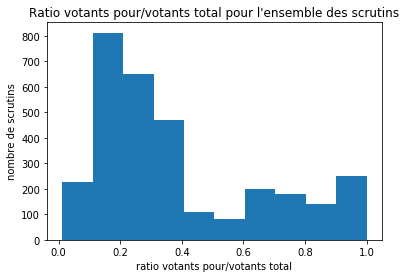

In [36]:
#on regade le pourcentage de 'pour' à chaque scrutin -> quelle majorité ? très large ou ça passe de justesse ? 
pourcentagepour = (df.groupby('idScrutin')['pour'].sum()/df.groupby('idScrutin')['pour'].count())/(df.groupby('idScrutin')['votants'].sum()/df.groupby('idScrutin')['votants'].count())
pourcentagepour.plot(kind='hist')
plt.xlabel('ratio votants pour/votants total')
plt.ylabel('nombre de scrutins')
plt.title("Ratio votants pour/votants total pour l'ensemble des scrutins")

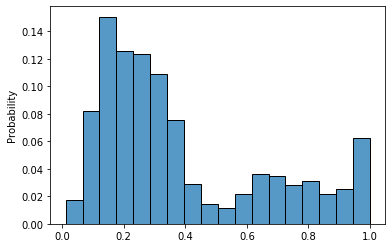

In [24]:
pourcentagepour = (df.groupby('idScrutin')['pour'].sum()/df.groupby('idScrutin')['pour'].count())/(df.groupby('idScrutin')['votants'].sum()/df.groupby('idScrutin')['votants'].count())
pourcentagepour = np.array(pourcentagepour)
sns.histplot(pourcentagepour, stat = 'probability')

Text(0.5, 1.0, "Ratio votants pour/votants total pour les scrutins avec une abstention 'moyenne'")

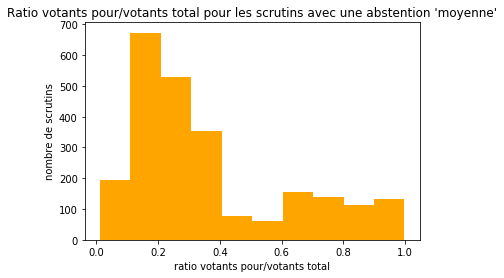

In [37]:
pourcentagepourdf2 = (df2.groupby('idScrutin')['pour'].sum()/df2.groupby('idScrutin')['pour'].count())/(df2.groupby('idScrutin')['votants'].sum()/df2.groupby('idScrutin')['votants'].count())
pourcentagepourdf2.plot(kind='hist', color='orange')
plt.xlabel('ratio votants pour/votants total')
plt.ylabel('nombre de scrutins')
plt.title("Ratio votants pour/votants total pour les scrutins avec une abstention 'moyenne'")

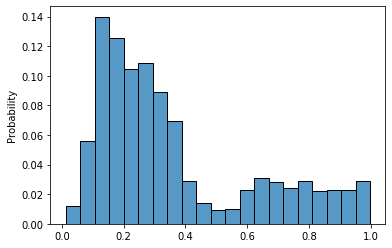

In [28]:
pourcentagepourdf2 = (df2.groupby('idScrutin')['pour'].sum()/df2.groupby('idScrutin')['pour'].count())/(df2.groupby('idScrutin')['votants'].sum()/df2.groupby('idScrutin')['votants'].count())
pourcentagepourdf2 = np.array(pourcentagepourdf2)
sns.histplot(pourcentagepourdf2, stat="probability")

Text(0.5, 1.0, 'Ratio votants pour/votants total pour les scrutins avec une abstention forte')

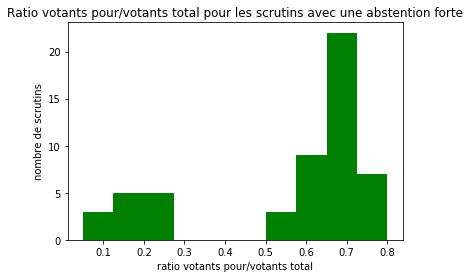

In [38]:
pourcentagepourdf3 = (df3.groupby('idScrutin')['pour'].sum()/df3.groupby('idScrutin')['pour'].count())/(df3.groupby('idScrutin')['votants'].sum()/df3.groupby('idScrutin')['votants'].count())
pourcentagepourdf3.plot(kind='hist', color='green')
plt.xlabel('ratio votants pour/votants total')
plt.ylabel('nombre de scrutins')
plt.title("Ratio votants pour/votants total pour les scrutins avec une abstention forte")

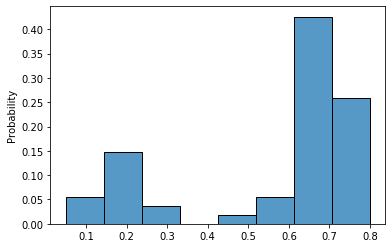

In [31]:
pourcentagepourdf3 = (df3.groupby('idScrutin')['pour'].sum()/df3.groupby('idScrutin')['pour'].count())/(df3.groupby('idScrutin')['votants'].sum()/df3.groupby('idScrutin')['votants'].count())
pourcentagepourdf3 = np.array(pourcentagepourdf3)
sns.histplot(pourcentagepourdf3, stat="probability")

Text(0.5, 1.0, 'Ratio votants pour/votants total pour les scrutins avec une abstention nulle')

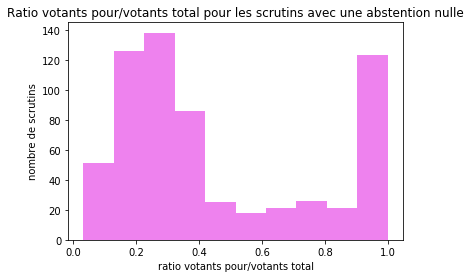

In [39]:
pourcentagepourdf4 = (df4.groupby('idScrutin')['pour'].sum()/df4.groupby('idScrutin')['pour'].count())/(df4.groupby('idScrutin')['votants'].sum()/df4.groupby('idScrutin')['votants'].count())
pourcentagepourdf4.plot(kind='hist', color='violet')
plt.xlabel('ratio votants pour/votants total')
plt.ylabel('nombre de scrutins')
plt.title("Ratio votants pour/votants total pour les scrutins avec une abstention nulle")

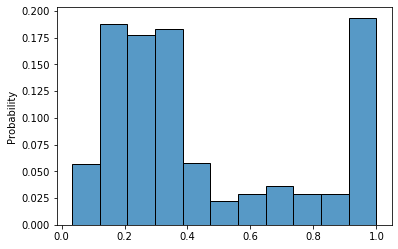

In [33]:
pourcentagepourdf4 = (df4.groupby('idScrutin')['pour'].sum()/df4.groupby('idScrutin')['pour'].count())/(df4.groupby('idScrutin')['votants'].sum()/df4.groupby('idScrutin')['votants'].count())
pourcentagepourdf4 = np.array(pourcentagepourdf4)
sns.histplot(pourcentagepourdf4, stat="probability")

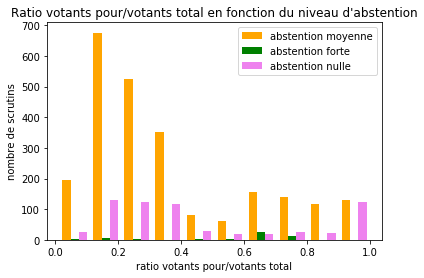

In [40]:
plt.hist([pourcentagepourdf2, pourcentagepourdf3, pourcentagepourdf4], color = ['orange', 'green', 'violet'],
            histtype = 'bar', label = ['abstention moyenne', 'abstention forte', 'abstention nulle']) 
plt.xlabel('ratio votants pour/votants total')
plt.ylabel('nombre de scrutins')
plt.title("Ratio votants pour/votants total en fonction du niveau d'abstention")
plt.legend()

In [41]:
pourcentagepourdf4tri = pourcentagepourdf4.sort_values(ascending=False)
listepourcentagepourdf4 = list(pourcentagepourdf4tri)
pourcentagepourdf2tri = pourcentagepourdf2.sort_values(ascending=False)
listepourcentagepourdf2 = list(pourcentagepourdf2tri)
pourcentagepourdf3tri = pourcentagepourdf3.sort_values(ascending=False)
listepourcentagepourdf3 = list(pourcentagepourdf3tri)
pourcentagepourtri = pourcentagepour.sort_values(ascending=False)
listepourcentagepour = list(pourcentagepourtri)

Text(0.5, 1.0, 'Ratio votants pour/votants total en fonction des scrutins à abstention moyenne')

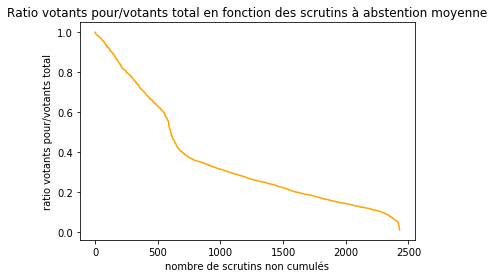

In [42]:
plt.plot(listepourcentagepourdf2, color ='orange')
plt.xlabel('nombre de scrutins non cumulés')
plt.ylabel('ratio votants pour/votants total')
plt.title('Ratio votants pour/votants total en fonction des scrutins à abstention moyenne')

Dans les cas où l'abstention est "moyenne", les votes sont peu consensuels : on a presque une droite (on aurait quasiment une bissectrice si on avait ordonné les ratios dans le sens croissant)

Text(0.5, 1.0, 'Ratio votants pour/votants total en fonction des scrutins à abstention forte')

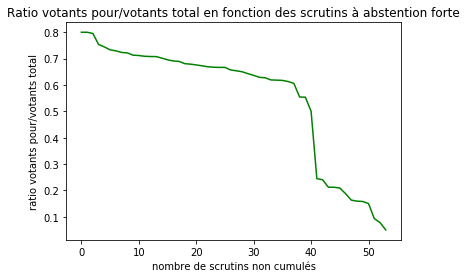

In [43]:
plt.plot(listepourcentagepourdf3, color='green')
plt.xlabel('nombre de scrutins non cumulés')
plt.ylabel('ratio votants pour/votants total')
plt.title('Ratio votants pour/votants total en fonction des scrutins à abstention forte')

Dans les cas où l'abstention est forte, la courbe n'a pas la même allure : les votes semblent beaucoup plus consensuels dans la mesure où les votants pour sont largement majoritaires (> 60%) des votants pour plus des 3/4 des scrutins

Text(0.5, 1.0, 'Ratio votants pour/votants total en fonction des scrutins à abstention nulle')

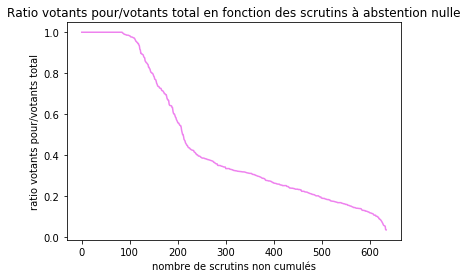

In [44]:
plt.plot(listepourcentagepourdf4, color='violet')
plt.xlabel('nombre de scrutins non cumulés')
plt.ylabel('ratio votants pour/votants total')
plt.title('Ratio votants pour/votants total en fonction des scrutins à abstention nulle')

Dans le cas où l'abstention est nulle on a presque l'inverse de la courbe pour l'abstention forte -> les votes contre sont majoritaires (votes pour <40%) pour les 2/3 des scrutins (on peut le lire comme ça car les abstentions sont nulles donc les votes non pour sont des votes contre) => idée que les députés se mobilisent plus (et donc s'abtstiennent moins) pour les scrutins avec lesquels ils sont en désaccord ? Il faudrait voir la nature de ces scrutins et voir les caractéristiques des votants qui font "barrage"